# Part 1 : Data Pre-Processing

## import basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## import training set

In [2]:
actual_training_set = pd.read_csv('Google_Stock_Price_Train.csv')

Sample data set. 

In [3]:
actual_training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Data dimension 

In [4]:
actual_training_set.shape

(1258, 6)

## Extract Training Set 
each attributes of the dataset is a feature and time series. for the experiement we're extracting the __Open__ column and updating the training set with it and save it in a __matrix format__. 

In [5]:
#this process is complicated for our purpose
#training_set=actual_training_set[['Open']]

training_set=actual_training_set.iloc[:,1:2].values  #:2 making it a matrix

In [6]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

check the dimension. 

In [7]:
training_set.shape

(1258, 1)

The plot of the current Dataset 

In [8]:
def plot_me(vector,style=[],lab=[]):
    %matplotlib inline
    plt.grid(True)
    
    if len(vector) == len(style) == len(lab):
        for i in range(len(vector)):
            plt.plot(np.arange(len(vector[i])), vector[i], 
                     style[i], label=lab[i])
    else: 
        print('Error : dimention error! ')
    
    plt.legend()
    plt.show()

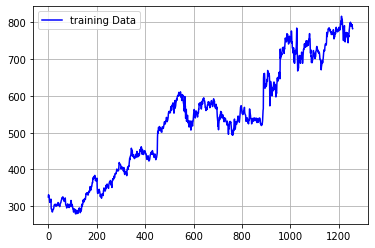

In [9]:
plot_me(vector=[training_set],
        style=['b-'],
        lab=['training Data'])

## Feature Scalling 
there are two options for feature scalling 
1. Standardisaton : $X_{stand}=\frac{X-\mu_X}{\sigma_X}$
2. Normalization : $X_{norm}=\frac{X-Min(X)}{Max(X)-Min(X)}$ 

we'll apply both

In [10]:
#Apply Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scalled=sc.fit_transform(training_set)

plot of scalled Training data 

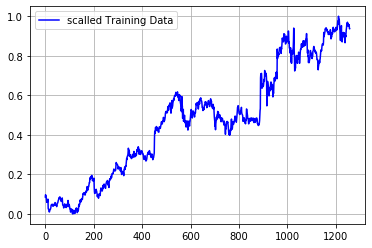

In [11]:
plot_me(vector=[training_set_scalled],
        style=['b-'],
        lab=['scalled Training Data'])

## Train-Test Split 

if you have stock price in time $t$, you're predicting stock price at time $t+1$. 

In [12]:
X_train = training_set_scalled[:-1] #all stock price except last 
y_train = training_set_scalled[1:] #stock price shifted by 1

## Reshapping 
the purpose of reshapping is to change the dimention from 2D to 3D, the 3rd dimention is needed to make it a __Tensor__ as to be compatible with Keras moreover Tensorflow input format. `(batch_size, time_step, feature)`

In [13]:
X_train_t = np.reshape(X_train, (X_train.shape[0], #obs
                                 X_train.shape[1], #ts
                                 1)                #feature
                      )

In [14]:
X_train_t.shape

(1257, 1, 1)

In [15]:
y_train.shape

(1257, 1)

In [16]:
X_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95163331],
       [0.95725128],
       [0.93796041]])

In [17]:
y_train

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Part 2 : Building the RNN

## import keras libraries

In [18]:
from keras.models import Sequential 
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


## Initialise Deep Regressor

In [19]:
#init RNN
regressor = Sequential()

## Adding Layers

In [20]:
#Adding input layers
regressor.add(LSTM(units = 4, #number of memory units
              activation = 'sigmoid',  #sigmoid
              input_shape = (None, 1)) #(time_step, feature)
             )

#Adding output layer
regressor.add(Dense(units = 1)) #since predicting one value 

Instructions for updating:
Colocations handled automatically by placer.


## Compile The Model

In [21]:
#Compile the model
regressor.compile(optimizer = 'adam', #rmsprop gives same out but more memory
                  loss='mean_squared_error') 

## Train the Model

In [22]:
import time

Instructions for updating:
Use tf.cast instead.
time taken without early stopping : 26.552 secs


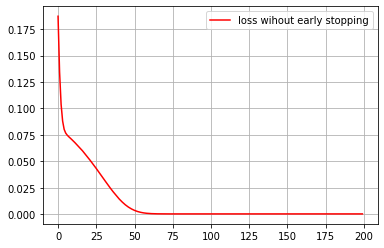

In [23]:
#Train the network
t =time.time()

learn_his = regressor.fit(X_train_t, y_train, batch_size=32, epochs=200, verbose=False)

print(f'time taken without early stopping : {round(time.time()-t,3)} secs')

#plot Loss
plt.grid()
plt.plot(learn_his.history['loss'],'r-',label = 'loss wihout early stopping')
plt.legend()
plt.show()

### Speeding up learning process

time taken without early stopping : 0.338 Secs


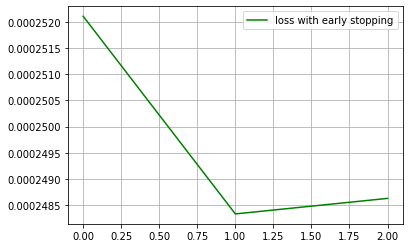

In [33]:
#Train the network
t =time.time()
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=0)

learn_his = regressor.fit(X_train_t, y_train, batch_size=32, epochs=200, verbose=False, callbacks=[early_stop])
print(f'time taken without early stopping : {round(time.time()-t,3)} Secs')

#plot Loss
plt.grid()
plt.plot(learn_his.history['loss'],'g-',label = 'loss with early stopping')
plt.legend()
plt.show()

# Part 3 : make Forecast

## Build a test Set

In [25]:
#Test Set 
test_set = pd.read_csv('Google_stock_Price_Test.csv')
X_test = test_set.iloc[:,1:2].values

## Make Prediction

In [26]:
# Make prediction 
X_test_scalled = sc.transform(X_test)
X_test_t = np.reshape(X_test_scalled, (X_test.shape[0],
                               X_test.shape[1],
                               1)
                     )

### Pre-Scalling

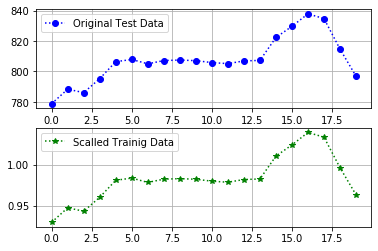

In [27]:
ax1 = plt.subplot('211')
ax2 = plt.subplot('212')

ax1.grid()
ax2.grid()

ax1.plot(X_test,'b:o' , label = 'Original Test Data')
ax2.plot(X_test_scalled,'g:*' , label = 'Scalled Trainig Data')

ax1.legend()
ax2.legend()

plt.show()

In [28]:
y_pred = regressor.predict(X_test_t)
y_pred_org = sc.inverse_transform(y_pred) # restore original scale 

## Plot the graph 

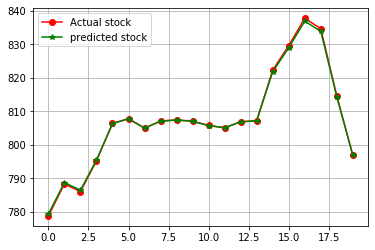

In [36]:
#Plot
plot_me(vector = [X_test,y_pred_org], 
        style = ['r-o','g-*'],
        lab = ['Actual stock','predicted stock'])

In [31]:
from platform import python_version
print(python_version())

3.7.3
